In [2]:
import tensorflow
import sys
sys.path.append('../models/stylegan2')

In [32]:
import dnnlib
import dnnlib.tflib as tflib
from run_generator import generate_images
import pretrained_networks
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
(1, 512)


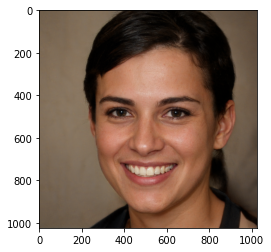

In [34]:
network_pkl = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'
truncation_psi = 0.5


# load the networks
print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False
if truncation_psi is not None:
    Gs_kwargs.truncation_psi = truncation_psi

# generate random z
seed = 6000
rnd = np.random.RandomState(seed)
z = rnd.randn(1, *Gs.input_shape[1:]) # [minibatch, component]

# generate image
print(z.shape)
tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
images = Gs.run(z, None, **Gs_kwargs) # [minibatch, height, width, channel]
# PIL.Image.fromarray(images[0], 'RGB').save(dnnlib.make_run_dir_path('seed%04d.png' % seed))
plt.imshow(images[0])